# Optimizacíon por Cúmulo de Partículas (PSO)

Es una heurística inspirada en el comportamiento natural social y movimientos dinámicos con comunicación observados en insectos, aves y peces.
Las características principales de esta heurística son:

- Modela el comportamiento social en grupos de animales.
- Emplea una estrategia de búsqueda colaborativa.
- Es un algoritmo basado en poblaciones (cúmulos) que en cierta forma actúan como un autómata celular.
- Cada solución es llamada partícula y se actualiza de manera paralela.
- Cada nueva posición de la partícula depende únicamente de su posición anterior y la de sus vecinos

### Actualización de la partícula. 

#### La posición de la partícula se actualiza de la siguiente manera:

\begin{equation}\label{actualiza_posicion}
x_i(k + 1) = x_i(k) + v_i(k + 1)\cdot\Delta t
\end{equation}

Donde $x_i(k)$ es la posición de la $i$-ésima partícula en el $k$-ésimo momento y análogamente $v_i(k)$ es la velocidad de la $i$-ésima partícula en el $k$-ésimo momento. $\Delta t$ es un factor para aumentar o disminuir la velocidad de la partícula, asumiremos $\Delta t = 1$. Por otra parte, $v_i(k + 1)$ está dada por la ecuación:

\begin{equation}\label{actualiza_velocidad}
v_i(k + 1) = \omega\cdot v_i(k) + \phi_1\cdot(x_i^{pbest}(k) - x_i(k)) + \phi_2\cdot(x_i^{gbest}(k) - x_i(k))
\end{equation}

Donde $\omega$ representa un factor de inercia y se puede interpretar como la tendencia que tiene la partícula a continuar en la misma dirección en la que se mueve, el término $\phi_1\cdot(x_i^{pbest}(k) - x_i(k))$ se puede interpretar como la tendencia de la partícula a dirigirse hacia el punto mas óptimo en el que ha estado, y finalmente, el término $\phi_2\cdot(x_i^{gbest}(k) - x_i(k))$ se puede interpretar como la tendencia que tiene la partícula a seguir al mejor individuo del cúmulo. $\phi_1$ y $\phi_2$ son constantes tales que $\phi_1 = c_1\cdot r_1$ y $\phi_2 = c_2\cdot r_2$, con $r_1, r_2 \sim U(0, 1)$ y $c_1$ y $c_2$ son coeficientes de aceleración.

<img src="esquema.png" width="300">

En el siguiente algoritmo se considera:

- Un solo cúmulo de partículas.
- Una topología aleatoria. 
- Un enfoque de inercia.

### Función de penalización para Problemas Multiobjetivo con Restricciones

Consideremos el problema

\begin{eqnarray}\label{F}
\text{minimizar} & F(\vec{x}) =  \left(f_1(\vec{x}), \dotsb, f_m(\vec{x})\right)^{\textbf{T}} \nonumber\\
\text{sujeto a} & g_i(\vec{x}) \leq 0, i = 1, \dotsb, p\\
 & l_i\leq x_i \leq u_i, i = 1, \dotsb, n \nonumber
\end{eqnarray}

Donde $\vec{x} = (x_1, x_2, \dotsb, x_n)^{\text{T}}\in \mathbb{R}^n$ es un vector $n$ dimensional, $g_i(\vec{x}) \leq 0$ son restricciones del problema y $l_i$ y $u_i$, $i = 1, 2, \dotsb, n$ son límites superiores e inferiores respectivamente para las variables $x_i$. La función vectorial $F$, consiste de $m$ funciones de variable real. Además, obsérvese que los limites inferiores y superiores para $x_i$ de igual manera se pueden expresar como restricciones para $F$.\\

**Grado de violación de la restricción**. Con el fin de conocer cuan una solución $x$ para (\ref{F}) viola las restricciones $g_i$, se define la función 

\begin{equation}\label{CVD}
V(\vec{x}) = |\displaystyle\sum_{j=1}^{p}\text{max}(g_j(\vec{x}), 0)|
\end{equation}

Por último, con el fin de lidiar con las restricciones de un problema de optmización, se define la **función de penalización** la cual fomenta que el algoritmo busque regiones factibles.

\begin{equation}\label{penalizacion}
g_{ap}^{te}(\vec{x}|\lambda, z^*) = g^{te}(\vec{x}|\lambda, z^*) + sV^2(\vec{x})
\end{equation}

## Desarrollo

### Optimización de la función $G_5$ mediante PSO

Consideremos el siguiente problema de optimización:

\begin{eqnarray}\label{G5}
\text{minimizar} & G_5(\vec{x}) = 3x_1 + 0.000001/x_1^3 + 0.000002/3x_2^3 \nonumber\\
\text{sujeto a} & x_3 - x_4 - 0.55 \leq 0\hspace{1cm}x_4 - x_3 - 0.55 \leq 0\\
 & 1000\sin(-x_3 - 0.25) + 1000\sin(-x_4 - 0.25) + 894.8 - x_1 = 0\nonumber\\
 & 1000\sin(x_3 - 0.25) + 1000\sin(x_3 - x_4 - 0.25) + 894.8 - x_2 = 0\nonumber\\
 & 1000\sin(x_4 - 0.25) + 1000\sin(x_4 - x_3 - 0.25) + 1294.8 = 0\nonumber\\
 & 0 \leq x_i \leq 1200, i=1, 2 \hspace{1cm} -0.55 \leq x_i \leq 0.55, i=3, 4\nonumber
\end{eqnarray}

Puesto que la función de penalización considera únicamente restricciones de desigualdad para poder calcular la función de grado de violación de la restricción, procederemos a reescribir las restricciones de (G5) de esa manera

$$h_1(\vec{x}) = 1000\sin(-x_3 - 0.25) + 1000\sin(-x_4 - 0.25) + 894.8 - x_1 = 0$$
$$h_2(\vec{x}) = 1000\sin(x_3 - 0.25) + 1000\sin(x_3 - x_4 - 0.25) + 894.8 - x_2 = 0$$
$$h_3(\vec{x}) = 1000\sin(x_4 - 0.25) + 1000\sin(x_4 - x_3 - 0.25) + 1294.8 = 0$$

$$h_i(\vec{x}) = 0 \Longrightarrow  0 \leq h_i(\vec{x}) \leq 0 \Longrightarrow -\epsilon \leq h_i(\vec{x}) \leq \epsilon, i = 1, 2, 3$$

donde epsilon es un numero positivo arbitrariamente pequeño

$$-\epsilon \leq h_i(\vec{x}) \leq \epsilon \Longrightarrow |h_i(\vec{x})| \leq \epsilon \Longrightarrow |h_i(\vec{x})| - \epsilon \leq 0$$

Luego, para las restricciones de ``caja''
 
$$0 \leq x_i \leq 1200 \Longrightarrow -x_i \leq 0 \text{ y } x_i - 1200 \leq 0 \text{ , } i = 1, 2$$

$$-0.55 \leq x_i \leq 0.55 \Longrightarrow |x_i| \leq 0.55 \Longrightarrow |x_i| - 0.55 \leq 0 \text{ , } i = 3, 4$$

Por lo tanto obtenemos el problema
\begin{eqnarray}\label{G5_modif}
\text{minimizar} & G_5(\vec{x}) = 3x_1 + 0.000001/x_1^3 + 0.000002/3x_2^3 \nonumber\\
\text{sujeto a} & g_1(\vec{x}) = x_3 - x_4 - 0.55 \leq 0\\
 & g_2(\vec{x}) = x_4 - x_3 - 0.55 \leq 0\nonumber\\
 & g_3(\vec{x}) = |h_1(\vec{x})| - \epsilon \leq 0\nonumber\\
 & g_4(\vec{x}) = |h_2(\vec{x})| - \epsilon \leq 0\nonumber\\
 & g_5(\vec{x}) = |h_3(\vec{x})| - \epsilon \leq 0\nonumber\\
 & g_6(\vec{x}) = -x_1 \leq 0 \nonumber\\
 & g_7(\vec{x}) = -x_2 \leq 0 \nonumber\\
 & g_8(\vec{x}) = x_1 - 1200 \leq 0 \nonumber\\
 & g_9(\vec{x}) = x_2 - 1200 \leq 0 \nonumber\\
 & g_{10}(\vec{x}) = |x_3| - 0.55 \leq 0 \nonumber\\ 
 & g_{11}(\vec{x}) = |x_4| - 0.55 \leq 0 \nonumber
\end{eqnarray}


Una vez que tenemos el problema de esta manera, podemos proceder a definir la función de penalización, y posteriormente aplicar a esa nueva función el algoritmo de **optimización por cúmulo de partículas**

\begin{equation}\label{penalizacion1}
\hat{G}_5 = 3x_1 + 0.000001/x_1^3 + 0.000002/3x_2^3 + sV^2(\vec{x})
\end{equation}

### Resultados

Consideramos los siguientes parámetros del algoritmo PSO.

- Factor de inercia $\omega \sim U(0.1, 0.5)$
- $c_1$, $c_2 \sim U(1.2, 2.0)$
- $s = 0.1$ (para la función de penalización)
- $C_{\text{max}} = 200$
- Tamaño de la población $N = 100$

In [13]:
using Random
using Plots

In [14]:
ϵ, s = 1e-15, 0.1

(1.0e-15, 0.1)

In [15]:
#Datos para G₅
h1(x) = 1000sin(-x[3] - 0.25) + 1000sin(-x[4] - 0.25) + 894.8 - x[1]
h2(x) = 1000sin(x[3] - 0.25) + 1000sin(x[3] - x[4] - 0.25) + 894.8 - x[2]
h3(x) = 1000sin(x[4] - 0.25) + 1000sin(x[4] - x[3] - 0.25) + 1294.8

g(x) = [-x[1], -x[2], x[1] - 1200.0, x[2] - 1200.0,
    x[3] - x[4] - 0.55, x[4] - x[3] - 0.55,
    abs(x[3]) - 0.55, abs(x[4]) - 0.55,
    abs(h1(x)) - ϵ, abs(h2(x)) - ϵ, abs(h3(x)) - ϵ]

V(x) = sum([max(g(x)[i], 0) for i in 1:length(g(x))]) #función de grado de violación de la restricción

f(x) = 3.0x[1] + 1e-6x[1]^3 + 2.0x[2] + 2e-6/(3.0x[2]^2) + s*V(x)^2 #función a optimizar

f (generic function with 1 method)

In [20]:
update_vel(xi, vi, xi_best, x_best, φ1, φ2, ω) = ω * vi + φ1 * (xi_best - xi) + 
                                                 φ2 * (x_best - xi)

function g_best(swarm) #mejor elemento del cúmulo
    N = size(swarm)[1]
    x_best = swarm[1, :]
    for i in 1:N
        if f(swarm[i, :]) < f(x_best)
            x_best = swarm[i, :]
        end
    end
    return x_best
end

g_best (generic function with 1 method)

In [21]:
function PSO(swarm, Cmax)
    N, dim = size(swarm)
    vels = zeros(N, dim)
    pbest = copy(swarm)
    ω = rand()*0.4 + 0.1
    c1 = rand()*0.8 + 1.2
    c2 = rand()*0.8 + 1.2
    r1, r2 = rand(1, 2)
    x_best = g_best(swarm)
    φ1, φ2 = c1*r1, c2*r2
    best_particle = []
    evals = []
    CVD = []
    
    for i in 1:Cmax
        for j in 1:N
            vels[j, :] = update_vel(swarm[j, :], vels[j, :],
                pbest[j, :], x_best, φ1, φ2, ω)
            swarm[j, :] += vels[j, :]
            if f(swarm[j, :]) < f(pbest[j, :])
                pbest[j, :] = swarm[j, :]
            end
            if f(swarm[j, :]) < f(x_best)
                x_best = swarm[j, :]
            end
        end
        if i == 1 || i % 10 == 0
            best = g_best(swarm)
            append!(best_particle, best)
            append!(evals, f(best))
            append!(CVD, V(best))
            #println("Ciclo ", i, ".  f:", round(f(best)),
            #    "  CVD:", round(V(best)), "  x:", [round(i, digits=4) for i in best])
        end
    end
    return [evals CVD]
end

PSO (generic function with 1 method)

In [28]:
N, dim = 100, 4
x1 = [rand()*1200 for i in 1:N]
x2 = [rand()*1200  for i in 1:N]
x3 = [rand()*1.1 - 0.55 for i in 1:N]
x4 = [rand()*1.1 - 0.55 for i in 1:N]
swarm = [x1 x2 x3 x4]
p = PSO(swarm, 200);

for i in 1:9
    x1 = [rand()*1200 for i in 1:N]
    x2 = [rand()*1200  for i in 1:N]
    x3 = [rand()*1.1 - 0.55 for i in 1:N]
    x4 = [rand()*1.1 - 0.55 for i in 1:N]
    swarm = [x1 x2 x3 x4]
    p += PSO(swarm, 200)
end

p = 0.1p

21×2 Array{Float64,2}:
 13058.7   250.633
  5684.2    95.293
  5514.31   87.5368
  5511.47   87.3836
  5511.1    87.5239
  5510.91   87.2995
  5510.84   87.2356
  5510.81   87.2667
  5510.81   87.2526
  5510.81   87.272
  5510.81   87.2783
  5510.81   87.2813
  5510.81   87.2787
  5510.81   87.2767
  5510.81   87.2811
  5510.81   87.2812
  5510.81   87.2811
  5510.81   87.2811
  5510.81   87.2811
  5510.81   87.2811
  5510.81   87.281

In [29]:
p = [2589.89 91.0968; 211.598 10.8851; 174.864 8.75209;
     165.796 8.29078; 163.705 7.9507; 163.565 7.85354;
     163.547 7.86721; 163.542 7.86426; 163.541 7.8693;
     163.54 7.86587; 163.523 7.93114; 163.48 7.83797;
     163.478 7.81942; 163.457 7.89366; 163.456 7.89444; 
     163.455 7.90192; 163.43 7.82893; 163.086 7.06346;
     163.08 7.04171; 163.079 7.03848; 163.076 7.01731];

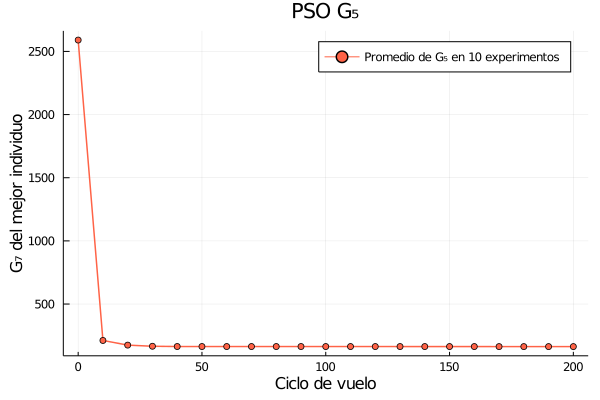

In [30]:
plot(0:10:200, p[:, 1], color="tomato",
    label="Promedio de G₅ en 10 experimentos",
    markershape = :circle, markersize = 3.5,
    title="PSO G₅",
    xlabel="Ciclo de vuelo",
    ylabel="G₇ del mejor individuo", 
    lw=1.5)

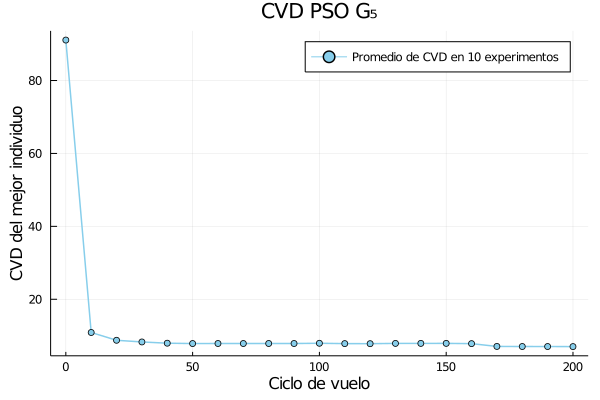

In [32]:
plot(0:10:200, p[:, 2], color="skyblue",
    label="Promedio de CVD en 10 experimentos",
    markershape = :circle, markersize = 3.5,
    xlabel="Ciclo de vuelo",
    ylabel="CVD del mejor individuo", 
    title="CVD PSO G₅",
    lw=1.5)